In [1]:
import numpy as np
from pytz import timezone
from datetime import datetime
import matplotlib.pyplot as plt

TZ = timezone('Europe/Moscow')

import sys
import os

sys.path.append(os.path.abspath('../common'))
sys.path.append(os.path.abspath('./'))

from env_move_sector_SAC import HumanMoveSectorAction_SAC

In [2]:

seed = int( datetime.now(TZ).strftime("%H%M%S") )
print(seed)

env = HumanMoveSectorAction_SAC(render_mode = 'human',
                            continuous=True, 
                            target_point_rand=False, 
                            object_ignore=False, 
                            seed=seed,
                           )

total_reward = 0.
step_reward = []
angle_step_reward = []
speed_step_reward = []
view_step_reward = []
stoper_step_reward = []
obstacle_stop_reward = []
obstacle_move_reward = []

observation, info = env.reset(seed=seed)
# course move, speed


for tick in range(800):

    action = env.teach_action()
    #if tick > 30:
    #№action = np.array([0.,0.5,0])

    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, info = env.reset()
        step_reward.append(reward)
        total_reward += reward
        print('BREAK',terminated, truncated)
        break
    
    step_reward.append(reward)
    total_reward += reward

    rews = env.get_rewards()
    angle_step_reward.append(rews['angle_reward'])
    speed_step_reward.append(rews['speed_reward'])
    view_step_reward.append(rews['view_reward'] )
    stoper_step_reward.append(rews['stoped_reward'])
    obstacle_stop_reward.append(rews['object_stop'])
    obstacle_move_reward.append(rews['object_move'])

print(len(step_reward))
print(total_reward)

173003


KeyboardInterrupt: 

In [ ]:
step_reward

In [3]:
env.close()

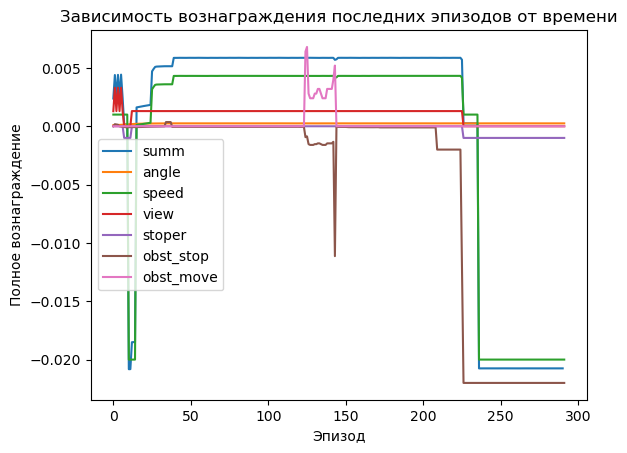

In [4]:
plt.plot(step_reward[:-1])
plt.plot(angle_step_reward)
plt.plot(speed_step_reward)
plt.plot(view_step_reward)
plt.plot(stoper_step_reward)
plt.plot(obstacle_stop_reward)
plt.plot(obstacle_move_reward)
plt.legend(['summ','angle','speed','view', 'stoper', 'obst_stop', 'obst_move'])
plt.title('Зависимость вознаграждения последних эпизодов от времени')
plt.xlabel('Эпизод')
plt.ylabel('Полное вознаграждение')
plt.show()

In [ ]:
from env_move_sector import HumanMoveSectorAction
from stable_baselines3 import DQN, SAC
from typing import Any, Dict, Tuple, Union
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import Logger, Video
from moviepy.editor import ImageSequenceClip
import torch
import numpy as np

DQN_path = "../sb3_SAC/"

tmp_path = DQN_path + "model_2"

seed = int( datetime.now(TZ).strftime("%H%M%S") )
env = HumanMoveSectorAction(render_mode = 'rgb_array', continuous=True, seed=seed)
model = SAC.load(tmp_path, env)

logger = Logger(folder = DQN_path, output_formats=["mp4"])

#Video
screens = []

def grab_screens(_locals: Dict[str, Any], _globals: Dict[str, Any]) -> None:
    """
    Renders the environment in its current state, recording the screen in the captured `screens` list

    :param _locals: A dictionary containing all local variables of the callback's scope
    :param _globals: A dictionary containing all global variables of the callback's scope
    """
    screen = env.render()
    screens.append(screen)

evaluate_policy(
    model,
    env,
    callback=grab_screens,
    n_eval_episodes=1,
    deterministic=True,
)

#logger.record(
#    "video",
#    Video(torch.from_numpy(np.asarray([screens])), fps=30),
#    exclude=("stdout", "log", "json", "csv"),
#)

# Generate a sequence of frames
clip = ImageSequenceClip(screens[:-1], fps=30)
clip.write_videofile('output.mp4')

In [1]:
import vector
import math

In [43]:

v1= vector.obj(rho=1,phi=0)
v2= vector.obj(rho=1,phi=4.5)


In [ ]:
math.acos(v1 @ v2)

In [ ]:
v1.deltaphi(v2)

In [34]:
v3 = v1.rotateZ(0.5)

In [ ]:
v3

In [26]:
d1= vector.obj(rho=1,phi=0, eta=0.5)
d2= vector.obj(rho=1,phi=0.5, eta =0)

d3 = vector.obj(x=1,y=0,z=0)
d4 = vector.obj(x=0,y=1,z=0)

In [28]:
d1/=d1.mag

In [ ]:
d1.mag

In [ ]:
d4.cross(d3)

In [1]:
import sys
import os
import math
import random

sys.path.append(os.path.abspath('./'))

from env_move_sector import SectorView

sectors = {}
#Az,Ev,D,T   
sectors[  0] = SectorView(0)
sectors[ 30] = SectorView(30)
sectors[ 60] = SectorView(60)
sectors[ 90] = SectorView(90)
sectors[120] = SectorView(120)
sectors[150] = SectorView(150)
sectors[180] = SectorView(180)
sectors[210] = SectorView(210)
sectors[240] = SectorView(240)
sectors[270] = SectorView(270)
sectors[300] = SectorView(300)
sectors[330] = SectorView(330)

In [ ]:

obst = {

    #1:  [-10,10,10,12],
    #2:  [-15,12,0,10],
    #3:  [10,11,26,13],
    #4:  [-25,13,-14,12],
    #5:  [10,18,170,3],
    #6:  [-150,14,10,22],
    #7:  [150,10,-150,12],
    8:  [20,10,40,12],
    9:  [50,10,70,12],
    10: [80,10,100,12],
    11: [110,10,130,12],
    12: [140,10,160,12],
    13: [170,10,190,12],
    14: [200,10,220,12],
    15: [230,10,250,12],
    16: [260,10,280,12],
    17: [290,10,310,12],
    18: [320,10,340,12],
    19: [350,10,10,12],
}



for k, s in sectors.items():
    s.clear()

for k, s in sectors.items():
    print(f'Sector {k} - size: {s.size()}')

for id, o in obst.items():
    for k, s in sectors.items():
        s.add_obstacle(id, 'tree', math.radians(o[0]), o[1],  math.radians(o[2]), o[3])

for k, s in sectors.items():
    print(s.get_obs())

In [ ]:

obst2 = {

    8:  [10,10,30,12],
    9:  [40,10,60,12],
    10: [70,10,90,12],
    11: [100,10,120,12],
    12: [130,10,150,12],
    13: [160,10,180,12],
    14: [190,10,210,12],
    15: [220,10,240,12],
    16: [250,10,270,12],
    17: [280,10,300,12],
    18: [310,10,330,12],
    19: [340,10,0,12],
}



for k, s in sectors.items():
    s.clear()

for k, s in sectors.items():
    print(f'Sector {k} - size: {s.size()}')

for id, o in obst2.items():
    for k, s in sectors.items():
        s.add_obstacle(id, 'tree', math.radians(o[0]), o[1],  math.radians(o[2]), o[3])

for k, s in sectors.items():
    print(k, s.get_obs())